# Ejemplos de Regresion Lineal 

Veremos ahora cómo realizar la regresión lineal en la computadora usado la librería Scipy de Python. También vamos a usar la librería Matplotlib para hacer los gráficos.

Como vamos a ver varios ejemplos, nos va a convenir definir una función que va a realizar la regresión lineal entre  dos vectores x,y representando conjuntos de datos del mismo tamaño.



In [119]:
import scipy.stats
import matplotlib.pyplot as plt

def regresion_lineal(x,y,tamaño_de_los_puntos=1):
    regresion = scipy.stats.linregress(x, y)
    alpha = regresion.slope 
    beta = regresion.intercept
    rho = regresion.rvalue
    
    # dibujamos los puntos 
    plt.scatter(x,y,s=tamaño_de_los_puntos)
    
    # Dibujamos la recta de regresión
    y_predicho = alpha * x + beta
    plt.plot(x, y_predicho, color="r")
    plt.show()

    # Mostramos los parámetros de la regresióm. 
    # ¡Notamos que podemos mostrar fórmulas matemáticas en LaTeX!

    from IPython.display import display, Math
    display(Math(r'\alpha='+str(alpha)))
    display(Math(r'\beta='+str(beta)))
    display(Math(r'\rho='+str(rho)))
    


## Un ejemplo con datos simulados

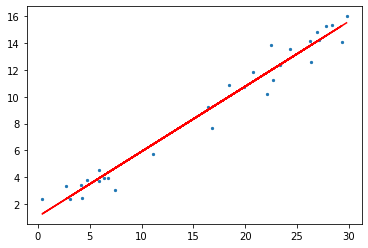

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [120]:
import numpy as np
# x uniforme en (0,30)

x = np.random.uniform(size=30, low=0, high=30)

# y = a*x + b con ruido
y = 0.5 * x + 1.0 + np.random.normal(scale=1, size=x.shape)
regresion_lineal(x,y,tamaño_de_los_puntos=5)


## Un ejemplo realista de regresión lineal usando datos sobre el Covid 19 - ¡Un poco de ciencia de datos hoy!

Usamos datos de https://ourworldindata.org/coronavirus que se pueden descargar en formato CSV (valores separados por comas) desde

https://covid.ourworldindata.org/data/owid-covid-data.csv

y usar libremente. Usamos la librería Pandas de Python para leer los datos en una estructura conveniente (DataFrame) que es similar a una planilla, y seleccionamos las filas que corresponden a Argentina.

In [121]:
import pandas
tabla = pandas.read_csv('./datos/owid-covid-data.csv')
df=tabla[tabla['iso_code']=='ARG']
tabla.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Podemos ver cuántas filas y columnas tiene nuestra tabla con

In [122]:
df.shape

(631, 63)

Como vemos hay un montòn de datos en nuestro Data Frame, seleccionamos dos columnas que 
pensamos que pueden estar correlacionadas (Elegimos el total de casos y el de muertes). Hay líneas que tiene  valores no disponibles, las eliminamos (para evitar errores). 

In [123]:
# Limpiamos de la tabla los dtos no disponibles
df1= df.dropna(subset=['total_cases','total_deaths'])
df1

iso_code      continent   location        date  total_cases  new_cases  \
4291      ARG  South America  Argentina  2020-03-08         12.0        4.0   
4292      ARG  South America  Argentina  2020-03-09         12.0        0.0   
4293      ARG  South America  Argentina  2020-03-10         17.0        5.0   
4294      ARG  South America  Argentina  2020-03-11         19.0        2.0   
4295      ARG  South America  Argentina  2020-03-12         19.0        0.0   
...       ...            ...        ...         ...          ...        ...   
4850      ARG  South America  Argentina  2021-09-18    5238610.0     1451.0   
4851      ARG  South America  Argentina  2021-09-19    5239232.0      622.0   
4852      ARG  South America  Argentina  2021-09-20    5241394.0     2162.0   
4853      ARG  South America  Argentina  2021-09-21    5243231.0     1837.0   
4854      ARG  South America  Argentina  2021-09-22    5245265.0     2034.0   

      new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
4291               1.714           1.0         1.0                0.143  ...   
4292               1.714           1.0         0.0                0.143  ...   
4293               2.286           1.0         0.0                0.143  ...   
4294               2.571           1.0         0.0                0.143  ...   
4295               2.571           1.0         0.0                0.143  ...   
...                  ...           ...         ...                  ...  ...   
4850            2143.714      114367.0        81.0              144.429  ...   
4851            2099.714      114428.0        61.0              146.571  ...   
4852            2080.429      114518.0        90.0              125.429  ...   
4853            1911.857      114579.0        61.0              109.000  ...   
4854            1843.857      114684.0       105.0              102.143  ...   

      cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
4291                191.032                  5.5            16.2   
4292                191.032                  5.5            16.2   
4293                191.032                  5.5            16.2   
4294                191.032                  5.5            16.2   
4295                191.032                  5.5            16.2   
...                     ...                  ...             ...   
4850                191.032                  5.5            16.2   
4851                191.032                  5.5            16.2   
4852                191.032                  5.5            16.2   
4853                191.032                  5.5            16.2   
4854                191.032                  5.5            16.2   

      male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
4291          27.7                     NaN                         5.0   
4292          27.7                     NaN                         5.0   
4293          27.7                     NaN                         5.0   
4294          27.7                     NaN                         5.0   
4295          27.7                     NaN                         5.0   
...            ...                     ...                         ...   
4850          27.7                     NaN                         5.0   
4851          27.7                     NaN                         5.0   
4852          27.7                     NaN                         5.0   
4853          27.7                     NaN                         5.0   
4854          27.7                     NaN                         5.0   

      life_expectancy  human_development_index  excess_mortality_cumulative  \
4291            76.67                    0.845                          NaN   
4292            76.67                    0.845                          NaN   
4293            76.67                    0.845                          NaN   
4294            76.67                    0.845                          N

Ya tenemos nuestros datos. Hacemos un gráfico de dispersión para ver si es razonable esperar una relación lineal entre ellos. $s=1$ es un parámetro para especificar el tamaño de los puntos (los queremos lo más pequeños posibles)

In [124]:
df1.plot.scatter('total_cases','total_deaths', s=1)


<AxesSubplot:xlabel='total_cases', ylabel='total_deaths'>

Repetimos el gráfico, hacemos la regresión lineal y dibujamos la recta resultante.

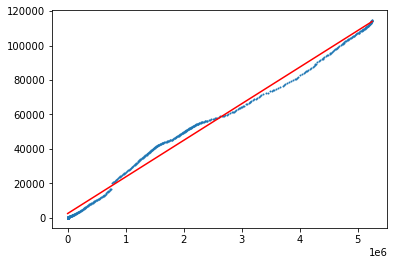

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [125]:
x=df1['total_cases'].values
y=df1['total_deaths'].values
regresion_lineal(x,y)


Como vemos, el ajuste por una recta resulta en realidad muy bueno. Ahora elijamos otras dos variables, como la cantidad de gente totalmente vacunada y el total de muertes.

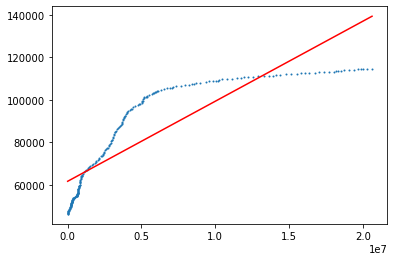

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [126]:
df2= df.dropna(subset=['people_fully_vaccinated','total_deaths'])
x=df2['people_fully_vaccinated'].values
y=df2['total_deaths'].values
regresion_lineal(x,y)


En este ejemplo vemos que la correlación no es tan buena. Vamos con un tercer ejemplo, analizando la correlación entre los casos nuevos y la cantidad total de gente vacunada.

In [127]:
df3= df.dropna(subset=['people_fully_vaccinated','new_cases'])
x=df3['new_cases'].values
y=df3['people_fully_vaccinated'].values
regresion_lineal(x,y)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Vemos que hay una cierta correlación negativa, pero no tan buena como en los ejemplos anteriores.


# Un ejemplo interesante: el cuarteto de Anscombe

Vamos a ver ahora un ejemplo clásico de cuatro conjuntos de datos con los mismos parámetros de regresión pero una distribución muy diferente. Pueden ver más información en el siguiente artículo de Wikipedia

https://en.wikipedia.org/wiki/Anscombe%27s_quartet

In [129]:
import seaborn as sns

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

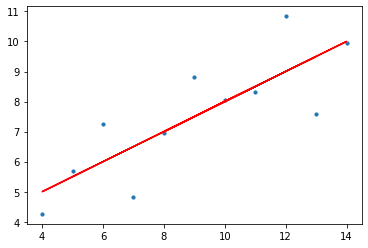

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [130]:
df1= df[df['dataset']=='I']
df1
regresion_lineal(df1['x'],df1['y'],tamaño_de_los_puntos=10)

In [131]:
df2= df[df['dataset']=='II']
df2
regresion_lineal(df2['x'],df2['y'],tamaño_de_los_puntos=10)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

En este ejemplo, la relaciòn entre las variables NO es lineal, y el coeficiente de correlación no es relevante. Habría que usar otro tipo de regresión más general.

In [132]:
df3= df[df['dataset']=='III']
df3
regresion_lineal(df3['x'],df3['y'],tamaño_de_los_puntos=10)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Acá vemos un ejemplo con un outlier (valor fuera de rango). Eso afecta mucho los coeficientes de regresión. Habría que usar un método robusto de regresión.


In [133]:
df4= df[df['dataset']=='IV']
df4
regresion_lineal(df4['x'],df4['y'],tamaño_de_los_puntos=10)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [134]:
df4

dataset     x      y
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0  12.50
41      IV   8.0   5.56
42      IV   8.0   7.91
43      IV   8.0   6.89

En este ejemplo vemos que la cuarta gráfica (abajo a la derecha) un valor atípico es suficiente para producir un coeficiente de correlación alto incluso 
cuando la relación entre las dos variables no es lineal. 